In [1]:
%pylab inline
from sigvisa import Sigvisa
from sigvisa.source.event import get_event
from sigvisa.infer.coarse_to_fine_init import ModelSpec, EventRunSpec, do_coarse_to_fine, initialize_from, do_inference
from sigvisa.infer.correlations.event_proposal import correlation_location_proposal, generate_historical_db
from sigvisa.infer.correlations.ar_correlation_model import estimate_ar, ar_advantage, iid_advantage

from sigvisa.graph.sigvisa_graph import SigvisaGraph
from sigvisa.treegp.gp import GPCov

import os, sys, traceback
import cPickle as pickle

stas = ['ASAR', 'KURK', 'MKAR', 'SONM', 'BVAR', 'FITZ', 'CTA', 'CMAR', 'WRA', 'ZALV', 'MJAR', 'AKTO', 'INK']

doublet = 5334939

evids = [5334501, 5334991, 5334726, 5335144, 5349684, 5335822, 5348178, 5334971, 5349536, 5335079, 5335116, 5335138, 5350499, 5336237, 5335425, 5335424, 5349441, 5336640, 5335577, 5350077, 5336889, 5335760, 5336967, 5337111, 533\
6015, 5337461, 5351821, 5351657, 5336724, 5351713, 5338302, 5338318, 5338388]


Populating the interactive namespace from numpy and matplotlib


In [2]:
from sigvisa.utils.geog import dist_km
from sigvisa.utils.isc import load_isc

isc_evs = dict([(evid, load_isc(evid)) for evid in evids + [doublet,]])
ev1 = isc_evs[5334939]
ev2 = isc_evs[5335822]
print dist_km((ev1.lon, ev1.lat), (ev2.lon, ev2.lat))

5.22985712412


In [3]:
from sigvisa.utils.isc import load_isc
from sigvisa.utils.geog import dist_km
isc_evs = [(evid, load_isc(evid)) for evid in evids]
main_ev = isc_evs[5][1]
#main_ev = get_event(evid=5335822)
isc_evs = dict([(evid, ev) for (evid, ev) in isc_evs if ev is not None])


In [4]:
hstas = ['AS12', 'MK31', 'CM16', 'FITZ']

history = generate_historical_db(hstas, evids, bands=["freq_0.8_4.5"], chans=["auto"],len_s=10.0, evs=isc_evs)

1240230341.75 1240230774.37
1240230715.08 1240230925.08
1240230507.45 1240231082.55
1240230272.99 1240230482.99
1240232137.9 1240232347.9
1240232513.78 1240232723.78
1240232305.2 1240232515.2
1240232072.21 1240232282.21
1240238431.9 1240238641.9
1240238805.45 1240239015.45
1240238597.0 1240238807.0
1240238363.61 1240238573.61
1240239571.7 1240239781.7
1240239944.45 1240240154.45
1240239735.6 1240239945.6
1240239503.84 1240239713.84
1240241574.35 1240242005.69
1240241946.92 1240242164.7
1240241739.3 1240241949.3
1240241505.56 1240241715.56
1240243583.0 1240243793.0
1240243956.05 1240244166.05
1240243748.3 1240243958.3
1240243514.91 1240243724.91
1240247464.0 1240247674.0
1240247836.82 1240248046.82
no arrivals found for evid 5334971 at station CM16
no arrivals found for evid 5334971 at station FITZ
1240249325.45 1240249535.45
1240249697.42 1240249907.42
no arrivals found for evid 5349536 at station CM16
no arrivals found for evid 5349536 at station FITZ
1240250610.9 1240251043.25
124025

In [5]:
doublet_ev = get_event(evid=doublet)
rs = EventRunSpec(evids=[doublet,], stas=["MKAR"], runids=(1,), disable_conflict_checking=False)

ms1 = ModelSpec(template_model_type="gp_lld", wiggle_family="db4_2.0_3_20.0", wiggle_model_type="gp_lld", max_hz=10.0, raw_signals=True)

#ms1 = ModelSpec(template_model_type="param", wiggle_family="iid", max_hz=10.0, raw_signals=True)
sg = rs.build_sg(ms1)
sg.event_end_time = doublet_ev.time + 200
sg.event_start_time = doublet_ev.time - 200


In [6]:
history[5][0].depth = 0.0
print sg.current_log_p()

-10549.4804188


In [7]:
from sigvisa.source.event import Event
def const_proposal(sg, fix_result=False, **kwargs):    
    ev = Event(lon=129.62, lat=-4.14, depth=36.0, time=1240245390.5, mb=4.2)
    if fix_result:
        return 0.0
    else:
        return ev, 0.0, ()

In [45]:
from sigvisa.infer.event_birthdeath import ev_birth_move_abstract
def correlation_prop_MKAR(sg, fix_result=None):
    return correlation_location_proposal(sg, history=history, stas=["MK31"], fix_result=fix_result)

ev_birth_move_abstract(sg, location_proposal=const_proposal, #correlation_prop_MKAR,
                       proposal_includes_mb=False, use_correlation=True, force_outcome=None)

proposing new ev evid None, loc 129.62 E 4.14 S, depth 36.0km, time 1240245390.5, mb 4.2, natural source
proposing to associate template 1 at MK31,P with assoc lp -0.0
proposing to birth new phase MK31,P with assoc lp -0.0 tmpl lp 3.642001
birth qforward +  [ -5.00042998e-05] 3.64200065555 = [ 3.64195065]
proposing to deassociate at MK31 (lp -0.0)
eid 30 proposing mb 4.61635578695 from dist 4.54547224073 0.30023748638
birth helper 0.256373343051 [ 3.64195065] 0.0 4.55431688442
n_uatemplate: -0.0
n_event: -7.9
ev priors: ev -11.9
ev observations: ev 0.0
tt_residual: ev -0.3
ev global cost (n + priors + tt): -20.1
coda_decay: ev -1.8 ua 0.0 total -1.8
peak_decay: ev -2.3 ua 0.0 total -2.3
peak_offset: ev -1.5 ua 0.0 total -1.5
coda_height: ev 0.1 ua 0.0 total 0.1
mult_std_wiggle: ev 0.0 ua 0.0 total 0.0
coef jointgp: 0.0
total param: ev -5.5 ua 0.0 total -5.5
priors+params: ev -25.6 ua -0.0 total -25.6
station noise (observed signals): -2304.8
overall: -2330.4
official: -2330.4
birth mov

False

In [9]:
print sg.current_log_p()
wn = sg.station_waves["MK31"][0]

for arr in wn.arrivals():
    a, tg = wn.get_template_params_for_arrival(*arr)
    print arr
    print a

[-2326.13294583]
(1, 'P')
{'coda_height': 1.6443769166681665, 'arrival_time': 1240246031.5518553, 'coda_decay': -4.343872422941727, 'peak_decay': -4.306792400864116, 'peak_offset': -1.0154727227914537}


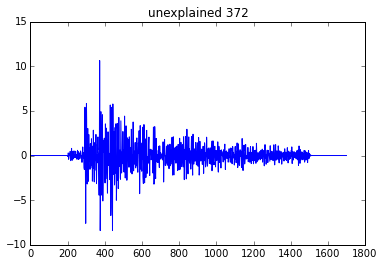

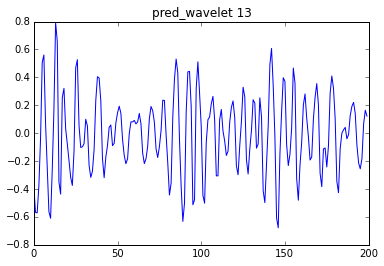

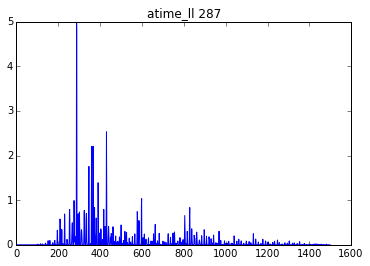

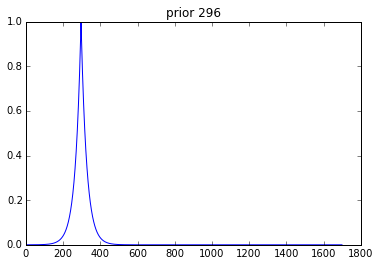

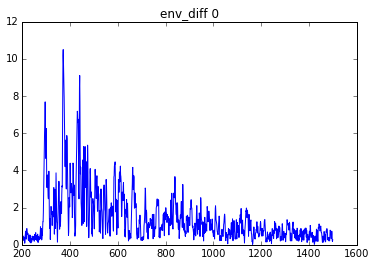

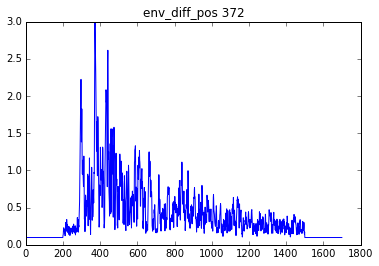

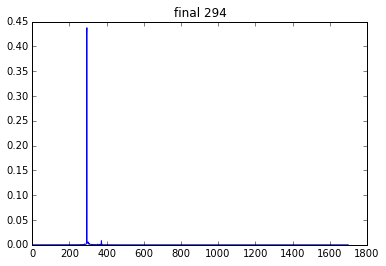

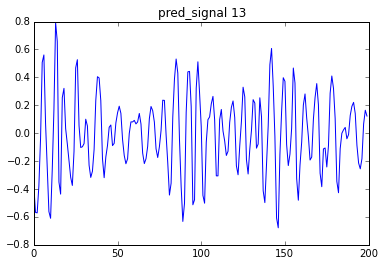

In [10]:

def plot_debug_dists():
    dd = sg.debug_dists["wave_MK31_BHZ_freq_0.8_4.5_1240246002.8"]
    for k in dd.keys():
        figure()
        plot(dd[k])
        title("%s %d" % (k, np.argmax(dd[k])))
        
plot_debug_dists()

In [11]:
print sg.current_log_p()
print sg.current_log_p_breakdown()

[-2564.34738735]
n_uatemplate: -0.0
n_event: -7.9
ev priors: ev -14.7
ev observations: ev 0.0
tt_residual: ev -0.5
ev global cost (n + priors + tt): -23.1
coda_decay: ev -1.5 ua 0.0 total -1.5
peak_decay: ev -0.6 ua 0.0 total -0.6
peak_offset: ev -1.1 ua 0.0 total -1.1
coda_height: ev -3.0 ua 0.0 total -3.0
mult_std_wiggle: ev 0.0 ua 0.0 total 0.0
coef jointgp: 0.0
total param: ev -6.2 ua 0.0 total -6.2
priors+params: ev -29.2 ua -0.0 total -29.2
station noise (observed signals): -2535.1
overall: -2564.3
official: -2564.3
None


-2300.25255219


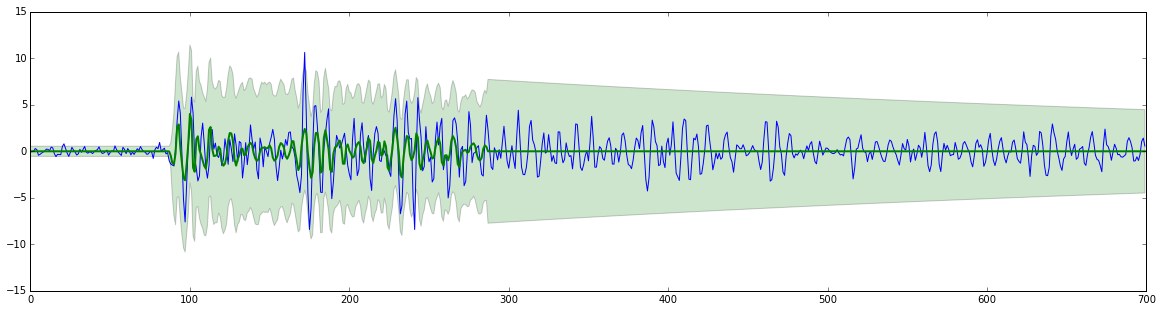

In [13]:
si=200
ei=900
s1 = wn.tssm.obs_var(1700)
def plot_predicted():
    f = figure(figsize=(20, 5))
    wn = sg.station_waves["MK31"][0]
    z1 = wn.tssm.prior_sample(1700, 0)
    #plot(z1[200:600])
    s1 = wn.tssm.obs_var(1700)
    m1 = wn.tssm.mean_obs(1700)
    #plot(m1[si:ei], lw=2)
    #plot(m1[si:ei]+np.sqrt(s1)[si:ei], lw=4)
    print wn.log_p()
    #u1 = wn.unexplained_kalman()
    figure(figsize=(20, 5))
    plot(wn.get_value()[si:ei])
    #plot(u1[si:ei])
    plot(m1[si:ei], lw=2)
    plt.fill_between(np.arange(ei-si), m1[si:ei]+2*np.sqrt(s1[si:ei]),  m1[si:ei]-2*np.sqrt(s1[si:ei]), facecolor="green", alpha=0.2)
    #figure(figsize=(20, 5))
    #subtracted1 = wn.get_value() - m1

    #plot(subtracted1[si:ei])
    #print wn.nm.log_p(subtracted1)

plot_predicted()



In [12]:
"""
from sigvisa.infer.run_mcmc import run_open_world_MH

run_open_world_MH(sg, steps=1000,
                      enable_event_openworld=False,
                      enable_event_moves=True,
                      enable_template_openworld=False,
                      enable_template_moves=True)
"""

'\nfrom sigvisa.infer.run_mcmc import run_open_world_MH\n\nrun_open_world_MH(sg, steps=1000,\n                      enable_event_openworld=False,\n                      enable_event_moves=True,\n                      enable_template_openworld=False,\n                      enable_template_moves=True)\n'

3.7
[-2326.09617074]
-2300.25255219


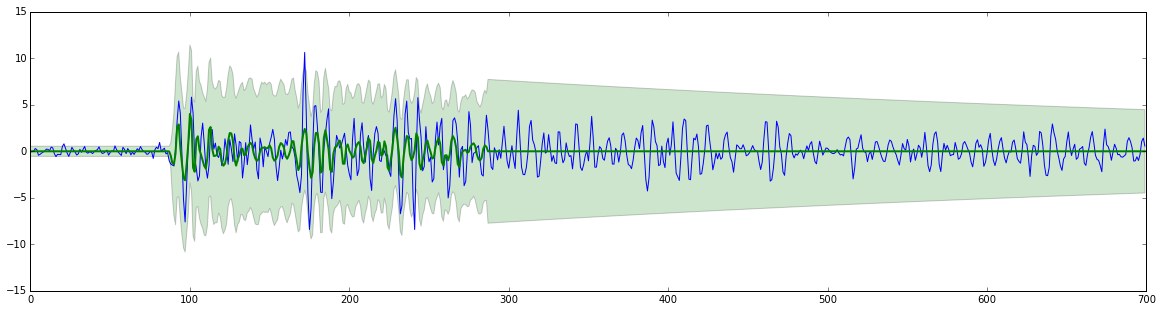

In [12]:
print sg.all_nodes["1;P;MK31;:;:;amp_transfer"].get_value() 
sg.all_nodes["1;P;MK31;:;:;amp_transfer"].set_value(2.6879)
print sg.current_log_p()
plot_predicted()
#3.70620502114 [-2564.34738735]

In [14]:
from sigvisa.infer.event_birthdeath import ev_death_move_abstract
ev_death_move_abstract(sg, location_proposal=correlation_prop_MKAR,  
                       proposal_includes_mb=False, use_correlation=True)

reverse dist 4.53863379296 0.0890673002524 old mb 4.67619993176 lp 0.184006214446
proposing to deassociate at MK31 (lp -0.0)
proposing to associate template 1 at MK31,P with assoc lp -0.0
proposing to birth new phase MK31,P with assoc lp -0.0 tmpl lp 3.782322
birth qforward +  [ -5.00042998e-05] 3.78232185459 = [ 3.78227185]
death helper 0.184006214446 [ 3.78227185] -7.77988356036
death move acceptance [ 403.72065647] from [-2326.09617074] -1914.0147817 [-3.8136055] [ 4.54712707]


/home/dmoore/python/sigvisa/infer/correlations/weighted_event_posterior.py:39: RuntimeWarning: divide by zero encountered in log
  origin_ll = np.log(rr) + llmax


True

In [14]:
print sg.current_log_p()
wn = sg.station_waves["MK31"][0]

for arr in wn.arrivals():
    a, tg = wn.get_template_params_for_arrival(*arr)
    print arr
    print a

-1818.29391249
(-1, 'UA')
{'coda_height': 1.430382822358639, 'arrival_time': 1240246031.2095184, 'coda_decay': -3.341748754617234, 'peak_decay': -4.8863122776660814, 'peak_offset': -0.13893537112135543}


-1890.55419502


NameError: name 'plot_debug_dists' is not defined

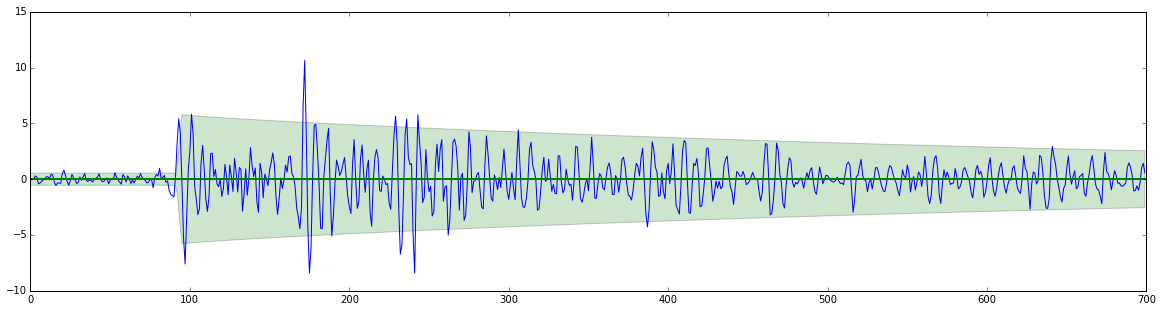

In [15]:
s2 = wn.tssm.obs_var(1700)

plot_predicted()

plot_debug_dists()

NameError: name 'plot_predicted' is not defined

In [16]:
print sg.current_log_p()
print sg.current_log_p_breakdown()

-1818.29391249
n_uatemplate: -13.8
n_event: -1.2
ev priors: ev 0.0
ev observations: ev 0.0
tt_residual: ev 0.0
ev global cost (n + priors + tt): -1.2
coda_decay: ev 0.0 ua -1.5 total -1.5
peak_decay: ev 0.0 ua -3.8 total -3.8
peak_offset: ev 0.0 ua -1.1 total -1.1
coda_height: ev 0.0 ua -2.1 total -2.1
mult_std_wiggle: ev 0.0 ua 0.0 total 0.0
coef jointgp: 0.0
total param: ev 0.0 ua -8.4 total -8.4
priors+params: ev -1.2 ua -22.2 total -23.5
station noise (observed signals): -1794.8
overall: -1818.3
official: -1818.3
None


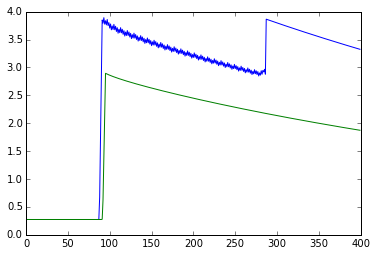

In [16]:

plot(np.sqrt(s1)[200:600])
plot(np.sqrt(s2)[200:600])
